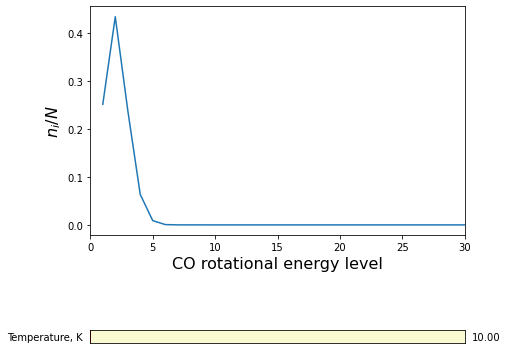

In [3]:
#                                                                                                           
# EMRA L3 NOTEBOOK 1. Showing how the boltzmann distribution changes as a function of temperature           
# Plot occupancy with a temperature slider.                                                                 
#                                                                                                           
# Perhaps do it for a few different species                                                                 
#                                                                                                           
# could do a cartoon ladder of energy levels or something                                                   
#                                                                                                           
# Started by T. J. Haworth in October 2020                                                                  
#                                                                                                           
# data from LAMDA database                                                                                  
#                                                                                                           


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

kB = 1.38e-23
levelsCO=np.arange(1,42,1)

#                                                                                                           
#energies are in cm^{-1} units in LAMDA database                                                            
#                                                                                                           

#energiesCO[:]=energiesCO[:]#*1.98630e-23                                                                   
#*1.98630e-23                                                                                               

energiesCO=[0.0, 3.845, 11.5350, 23.0695, 38.4481, 57.6704, 80.7354, 107.6424, 138.3904, 172.9780, 211.4041,253.6672, 299.7656, 349.6975, 403.4612, 461.0545, 522.4751, 587.7209, 656.7892, 729.6774, 806.3828, 886.9024,971.2332, 1059.3718, 1151.3150, 1247.0592, 1346.6008, 1449.9360, 1557.0607, 1667.9709, 1782.6624, 1901.1308,2023.3715, 2149.3799, 2279.1511, 2412.6801, 2549.9620, 2690.9913, 2835.7627, 2984.2707, 3136.5095]
gCO=[1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0,15.0,17.0,19.0,21.0, 23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0,39.0, 41.0, 43.0, 45.0, 47.0, 49.0, 51.0, 53.0, 55.0, 57.0, 59.0, 61.0, 63.0, 65.0, 67.0, 69.0, 71.0, 73.0,75.0, 77.0, 79.0, 81.0]
     
##Works out the partition function                                                                          
def calcPartitionFunction(energies, degeneracies, temperature):
    PartitionFunction = 0.0
    for i in range(0,len(energies)-1):
        PartitionFunction=PartitionFunction + (degeneracies[i]*np.exp(-energies[i]*1.98630e-23/kB/temperature))
    return PartitionFunction

def calcPops(energies, degeneracies, temperature, partitionFunction):
    Pop=np.zeros(len(energies))
    for i in range(0,len(energies)-1):
        Pop[i]=(1.0/partitionFunction)*degeneracies[i]*np.exp(-energies[i]*1.98630e-23/kB/temperature)
    return Pop
temperature = 10.0

COpart = calcPartitionFunction(energiesCO, gCO, temperature)
COpops = calcPops(energiesCO, gCO, temperature, COpart)


fig, ax1 = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.25, bottom=0.35)

axcolor = 'lightgoldenrodyellow'
axtemp = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
delta_temp=5.0
tempMin=10.0
tempMax=1000.0
temp0=10.0
sTemp=Slider(axtemp, 'Temperature, K', tempMin, tempMax, valinit=temp0, valstep=delta_temp)

ax1.set_xlabel("CO rotational energy level", fontsize=16)
ax1.set_ylabel(r"$n_i/N$", fontsize=16)
COlevPlot, =ax1.plot(levelsCO, COpops)
ax1.set_xlim(0,30)

def update(val):
    COpart = calcPartitionFunction(energiesCO, gCO, sTemp.val)
    COpops = calcPops(energiesCO, gCO, sTemp.val, COpart)
    COlevPlot.set_ydata(COpops)

sTemp.on_changed(update)

plt.show()
